# Introduction

DAV 6150 Module 5 Assignment

Understanding Classification Model Performance Metrics

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)


pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

# 1) Load data from github

# 2) Load data into a Dataframe

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/M5_Data.csv')

# Use head function to make sure the data loaded properly
df.head(3)

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660


In [3]:
df.shape

(181, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pregnant            181 non-null    int64  
 1   glucose             181 non-null    int64  
 2   diastolic           181 non-null    int64  
 3   skinfold            181 non-null    int64  
 4   insulin             181 non-null    int64  
 5   bmi                 181 non-null    float64
 6   pedigree            181 non-null    float64
 7   age                 181 non-null    int64  
 8   class               181 non-null    int64  
 9   scored.class        181 non-null    int64  
 10  scored.probability  181 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 15.7 KB


- 1) class: the actual classification for the observation


- 2) scored.class: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold))


- 3) scored.probability: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation

# 3) Use crosstab()

In [5]:
# Actual value
df['class'].value_counts(ascending=True)

1     57
0    124
Name: class, dtype: int64

In [6]:
# Predict value
df['scored.class'].value_counts(ascending=True)

1     32
0    149
Name: scored.class, dtype: int64

In [7]:
cross = pd.crosstab(df['class'], df['scored.class'],  
                     rownames = ['actual'], 
                     colnames = ['predict'])

In [8]:
cross

predict,0,1
actual,,
0,119,5
1,30,27


Because:

df['class'].value_counts(ascending=True) shows (1 = 57, 0 =124)

df['scored.class'].value_counts(ascending=True) shows (1 = 32, 0 =149)

So:

The number of (df['class'] = 1, df['scored.class'] = 1) is less or equal less than 32. In the cross table, we can see cross(1, 1) is 27 that is less than 32.

Next, using confusion_matrix to check.

In [9]:
# Using confusion_matrix to check
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(df['class'], df['scored.class']),
    columns = ["Predict 0", "Predict 1"],
    index = ["True 0", "True 1"]
)

,Predict 0,Predict 1
True 0,119,5
True 1,30,27


The two matrix are same.

# 4) Extract the Individual confusion matrix values

In [10]:
type(cross)

pandas.core.frame.DataFrame

In [11]:
cross.columns

Int64Index([0, 1], dtype='int64', name='predict')

In [12]:
cross.index

Int64Index([0, 1], dtype='int64', name='actual')

In [13]:
cross

predict,0,1
actual,,
0,119,5
1,30,27


In [14]:
# True Positive
TP = cross.loc[1, 1]
TP

27

In [15]:
# False Positive
# I mis-predict the 0 to 1. 我错误的把阴性，预测成阳性了
FP = cross.loc[0, 1]
FP

5

In [16]:
# True Negative
TN = cross.loc[0, 0]
TN

119

In [17]:
# False Negative
# I mis-predict the 1 to 0. 我错误的把阳性，预测成阴性了
FN = cross.loc[1, 0]
FN

30

In [18]:
print("True Positive = %d, False Positive = %d, True Negative = %d, False Negative = %d" %(TP,FP,TN,FN))

True Positive = 27, False Positive = 5, True Negative = 119, False Negative = 30


Next, using manual-calculate to check.

In [19]:
tp_test = ((df['class'] == 1) & (df['class'] == df['scored.class'])).sum()
tn_test = ((df['class'] == 0) & (df['class'] == df['scored.class'])).sum()
fp_test = ((df['class'] == 0) & (df['class'] != df['scored.class'])).sum()
fn_test = ((df['class'] == 1) & (df['class'] != df['scored.class'])).sum()

In [20]:
print("True Positive = %d, False Positive = %d, True Negative = %d, False Negative = %d" 
      %(tp_test,fp_test,tn_test,fn_test))

True Positive = 27, False Positive = 5, True Negative = 119, False Negative = 30


# 5) accuracy function

accuracy = (tp + tn) / (tp + tn + fp + fn)

In [21]:
def my_confusion_matrix(actuals, predicts):
    
    actuals_category = pd.Categorical(actuals, categories=[0, 1])
    
    predicts_category = pd.Categorical(predicts, categories=[0, 1])
    
    
    cor = pd.crosstab(actuals_category, predicts_category, dropna=False, 
                     rownames = ['actual'], 
                     colnames = ['predict'])
    
    #print(cor)
    tp = cor.loc[1, 1]
    fp = cor.loc[0, 1]
    tn = cor.loc[0, 0]
    fn = cor.loc[1, 0]
    #print("tp = %d, fp = %d, tn = %d, fn = %d" %(tp,fp,tn,fn))
    
    result_map = {"tp":tp, "fp":fp, "tn":tn, "fn":fn}
    
    # print(result_map)
    return result_map

In [22]:
def my_accuracy(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    accuracy = (cor_map['tp'] + cor_map['tn']) / (cor_map['tp'] + cor_map['tn'] + cor_map['fp'] + cor_map['fn'])
    
    #print("accuracy = %.4f" %accuracy)
    
    return accuracy

In [23]:
my_accuracy(df['class'], df['scored.class'])

0.8066298342541437

# 6) precision function

precision = (tp ) / (tp + fp)

In [24]:
def my_precision(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    #print("cor_map")
    #print(cor_map)
    result = (cor_map['tp']) / (cor_map['tp'] + cor_map['fp'])
    
    #print("precision = %.4f" %result)
    
    return result

In [25]:
my_precision(df['class'], df['scored.class'])

0.84375

# 7) sensitivity (recall) function

sensitivity = tp / (tp + fn)

In [26]:
def my_sensitivity(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    result = (cor_map['tp']) / (cor_map['tp'] + cor_map['fn'])
    
    #print("sensitivity = %.4f" %result)
    
    return result

In [27]:
my_sensitivity(df['class'], df['scored.class'])

0.47368421052631576

# 8) specificity function

specificity = tn / (tn + fp)

In [28]:
def my_specificity(actuals, predicts):
    cor_map = my_confusion_matrix(actuals, predicts)
    result = (cor_map['tn']) / (cor_map['tn'] + cor_map['fp'])
    
    #print("specificity = %.4f" %result)
    
    return result

In [29]:
my_specificity(df['class'], df['scored.class'])

0.9596774193548387

# 9) F1 Score function

precision = tp / (tp + fp)

sensitivity(recall) = tp / (tp + fn)

F1 = (2 * precision * sensitivity) / (precision + sensitivity)

In [30]:
def my_f1(actuals, predicts):
    
    precision = my_precision(actuals, predicts)
    
    sensitivity = my_sensitivity(actuals, predicts)
    
    
    result = (2 * precision * sensitivity) / (precision + sensitivity)
    
    #print("F1 = %.4f" %result)
    
    return result

In [31]:
my_f1(df['class'], df['scored.class'])

0.6067415730337079

# 10) plot ROC and calculate AUC

- scored.class: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold))


- scored.probability: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation

### Drow ROC 

In [32]:
df['scored.probability'].head(3)

0    0.328452
1    0.273190
2    0.109660
Name: scored.probability, dtype: float64

In [33]:
# to compare a threshold and a probability.
def compare_threshold(data, col = 'scored.probability', threshold = 0.5):
    predict = data.apply(
        lambda row: 1 if row[col] > threshold and row[col] < 1.0 else 0, axis=1)
    
    #print(predict.value_counts())
    
    return predict

In [34]:
# using different gap to calculate differnt sensitivity and (1- specificity)
def loop_cal_roc(data, gap = 0.1, actual_col = 'class'):
    start = 0.0
    
    sensitivity_arr = []
    negtive_1_specificity_arr = []
    while start <= 1.0:
        
        # print ("start = %.4f" %start)
        
        predict = compare_threshold(data, col = 'scored.probability', threshold = start)
        
        #print(predict.value_counts())
        #print(type(data[actual_col]))
        #print(data[actual_col].head(3))
        
        sensitivity = my_sensitivity(data[actual_col], predict)
        specificity = my_specificity(data[actual_col], predict)
        
        #print("sensitivity = %.4f, (1 - specificity) = %.4f" %(sensitivity,  (1- specificity)))
        
        sensitivity_arr.append(sensitivity)
        negtive_1_specificity_arr.append((1- specificity))
        
        start = start + gap
    
    # return a dataframe
    d = {"sensitivity": sensitivity_arr, "1 - specificity" : negtive_1_specificity_arr}
    roc_df = pd.DataFrame(d)
    return roc_df
        

In [35]:
roc_df = loop_cal_roc(df, gap = 0.01, actual_col = 'class')
roc_df.head(3)

,sensitivity,1 - specificity
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


#### Next, to draw ROC

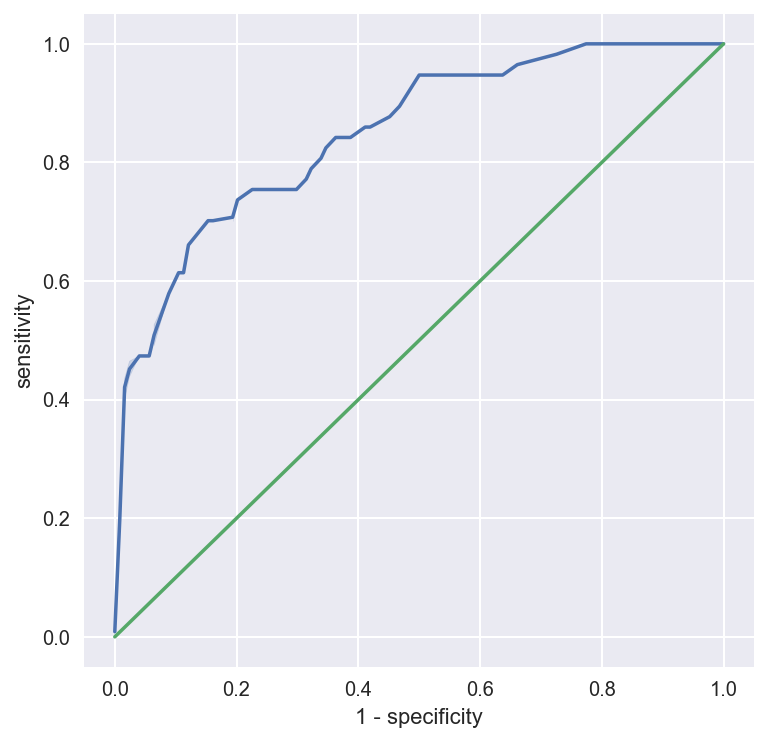

In [36]:
def my_roc():
    # draw ROC Cruve
    f, ax = plt.subplots(figsize=(6,6))
    sns.lineplot(data=roc_df, x="1 - specificity", y="sensitivity", ax = ax)

    # draw baseline
    point1 = [0.0, 0.0]
    point2 = [1.0, 1.0]

    x_values = [point1[0], point2[0]]

    y_values = [point1[1], point2[1]]

    plt.plot(x_values, y_values)

my_roc()

### calculate AUC

In [37]:
roc_df.head(3)

,sensitivity,1 - specificity
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


In [38]:
def cal_AUC(roc_df):
    sum_area = 0.0
    for i in range(roc_df.shape[0] - 1):
        #print(i, i+2)
        #print(roc_df.iloc[i: i + 2, :])
        
        dd = roc_df.iloc[i: i + 2, :]

        up_side = dd.iloc[1]['sensitivity']
        down_side = dd.iloc[0]['sensitivity']

        high = dd.iloc[0]['1 - specificity'] - dd.iloc[1]['1 - specificity']

        area = (up_side + down_side) * high / 2
        #print("up = %.4f, down = %.4f, high = %.4f, area = %.4f" %(up_side, down_side, high, area))

        sum_area += area
        
    return sum_area

In [39]:
# call function to calculate AUC     
AUC = cal_AUC(roc_df)

print("AUC = %.8f " % AUC)

AUC = 0.84889643 


# 11) run step 5 to step 9

In [40]:
accuracy = my_accuracy(df['class'], df['scored.class'])
precision = my_precision(df['class'], df['scored.class'])
sensitivity = my_sensitivity(df['class'], df['scored.class'])
specificity = my_specificity(df['class'], df['scored.class'])
f1 = my_f1(df['class'], df['scored.class'])


print("accuracy = %.4f, precision = %.4f, sensitivity = %.4f, specificity = %.4f, f1 = %.4f"
     % (accuracy, precision, sensitivity, specificity, f1))

accuracy = 0.8066, precision = 0.8438, sensitivity = 0.4737, specificity = 0.9597, f1 = 0.6067


# 12) Compare scikit-learn

### Compare confusion matrix

In [41]:
# Using confusion_matrix to check
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(df['class'], df['scored.class']),
    columns = ["Predict 0", "Predict 1"],
    index = ["True 0", "True 1"]
)

,Predict 0,Predict 1
True 0,119,5
True 1,30,27


In [42]:
# my confusion matrix
cross

predict,0,1
actual,,
0,119,5
1,30,27


### Compare accuracy

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(df['class'], df['scored.class'])

0.8066298342541437

In [44]:
# my accuracy
accuracy

0.8066298342541437

### Compare precision

In [45]:
from sklearn.metrics import precision_score
precision_score(df['class'], df['scored.class'])

0.84375

In [46]:
# my precision
precision

0.84375

### Compare sensitivity(recall)

In [47]:
from sklearn.metrics import recall_score
recall_score(df['class'], df['scored.class'])

0.47368421052631576

In [48]:
# my sensitivity
sensitivity

0.47368421052631576

### Compare f1

In [49]:
from sklearn.metrics import f1_score
f1_score(df['class'], df['scored.class'])

0.6067415730337079

In [50]:
# my f1
f1

0.6067415730337079

### metrics.classification_report()

In [51]:
df.head(3)

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660


# 13)  metrics.plot_roc_curve () and metrics.auc() 

In [52]:
y_test = df['class'].copy()
X_test = df.copy()
X_test = X_test.drop(columns=['class', 'scored.class', 'scored.probability'])

In [53]:
X_test.head(3)

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age
0,7,124,70,33,215,25.5,0.161,37
1,2,122,76,27,200,35.9,0.483,26
2,3,107,62,13,48,22.9,0.678,23


In [54]:
y_test.head(3)

0    0
1    0
2    1
Name: class, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
result = lr.fit(X_test, y_test)
result

LogisticRegression(max_iter=1000)

In [56]:
y_predict = lr.predict(X_test)
tp = (
    (y_test == 1) & (y_test == y_predict)
).sum()  # 123
tn = (
    (y_test == 0) & (y_test == y_predict)
).sum()  # 199
fp = (
    (y_test == 0) & (y_test != y_predict)
).sum()  # 25
fn = (
    (y_test == 1) & (y_test != y_predict)
).sum()  # 46

In [57]:
# True Positive = 27, False Positive = 5, True Negative = 119, False Negative = 30

print("tp = %d, fp = %d, tn = %d, fn = %d" %(tp,fp,tn,fn))


tp = 32, fp = 9, tn = 115, fn = 25


In [58]:
from sklearn.metrics import confusion_matrix
y_predict = lr.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=[
        "Predict 0",
        "Predict 1",
    ],
    index=["True 0", "True 1"],
)

,Predict 0,Predict 1
True 0,115,9
True 1,25,32


D:\dev\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


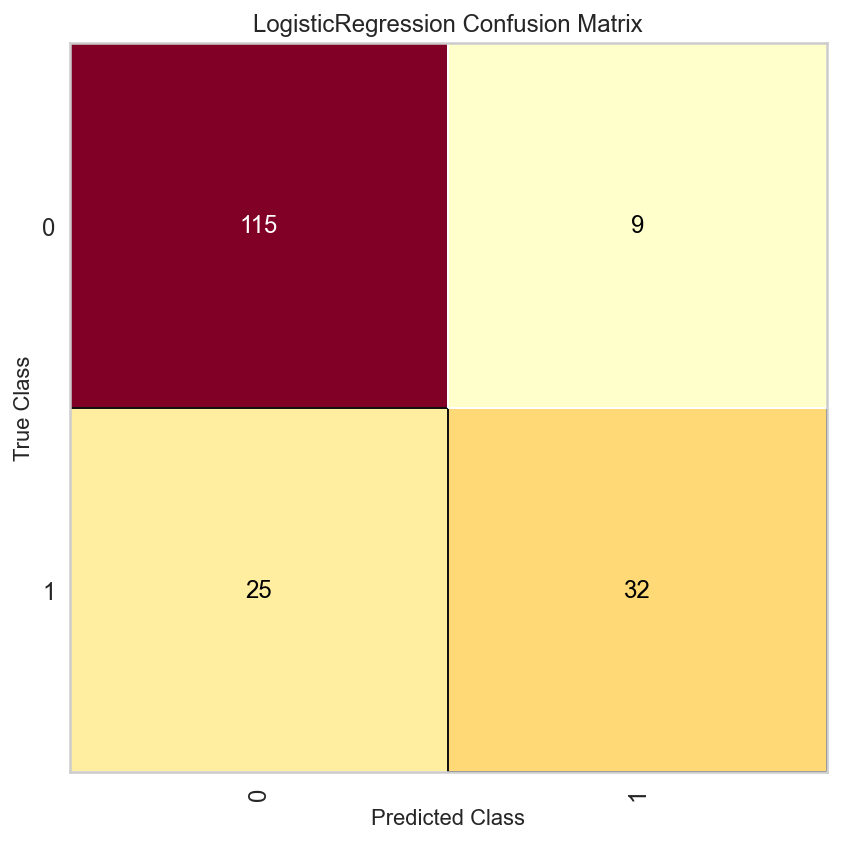

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ConfusionMatrix,
)
mapping = {0: "0", 1: "1"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    lr,
    classes=["0", "1"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

D:\dev\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


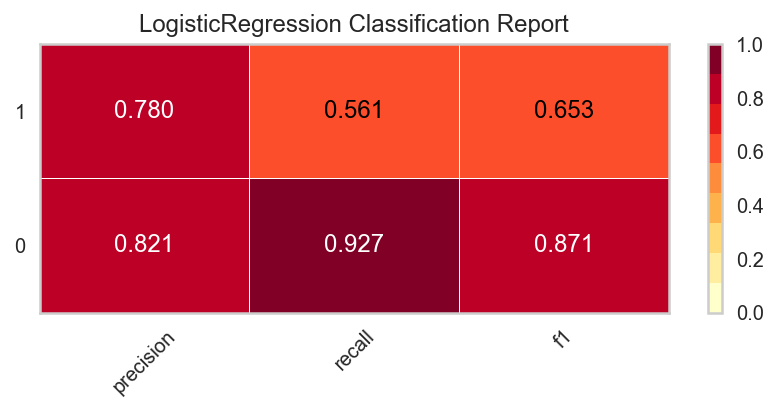

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [60]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ClassificationReport,
)
fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(
    lr,
    classes=["0", "1"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()
#fig.savefig("images/mlpr_1203.png", dpi=300)

In [61]:
from sklearn.metrics import roc_auc_score
y_predict = lr.predict(X_test)
roc_auc_score(y_test, y_predict)

0.7444114318053197

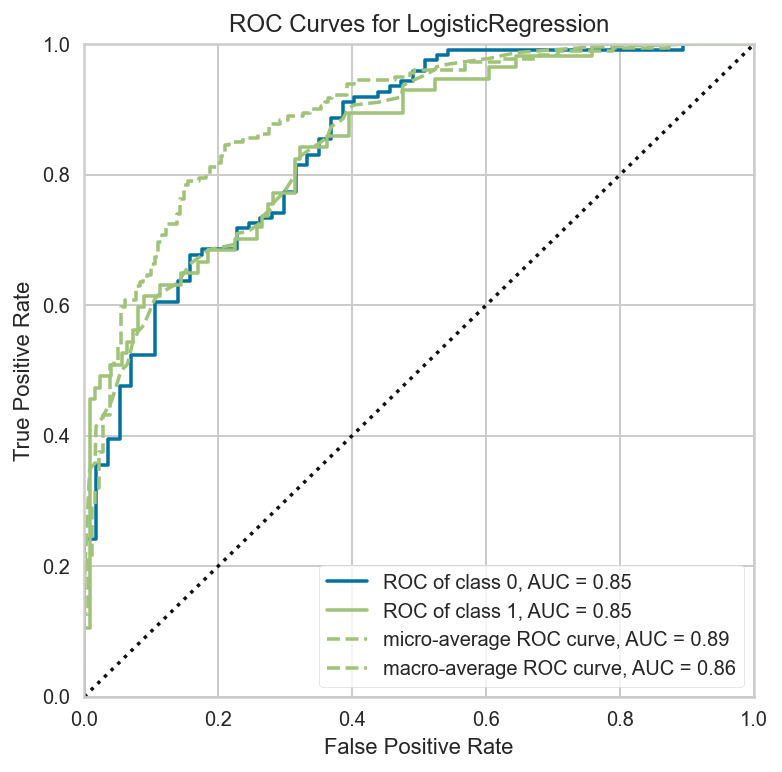

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(lr)
roc_viz.fit(X_test, y_test)
roc_viz.score(X_test, y_test)
roc_viz.poof()

### How do the results compare with the ROC/AUC function you’ve created for this assignment?

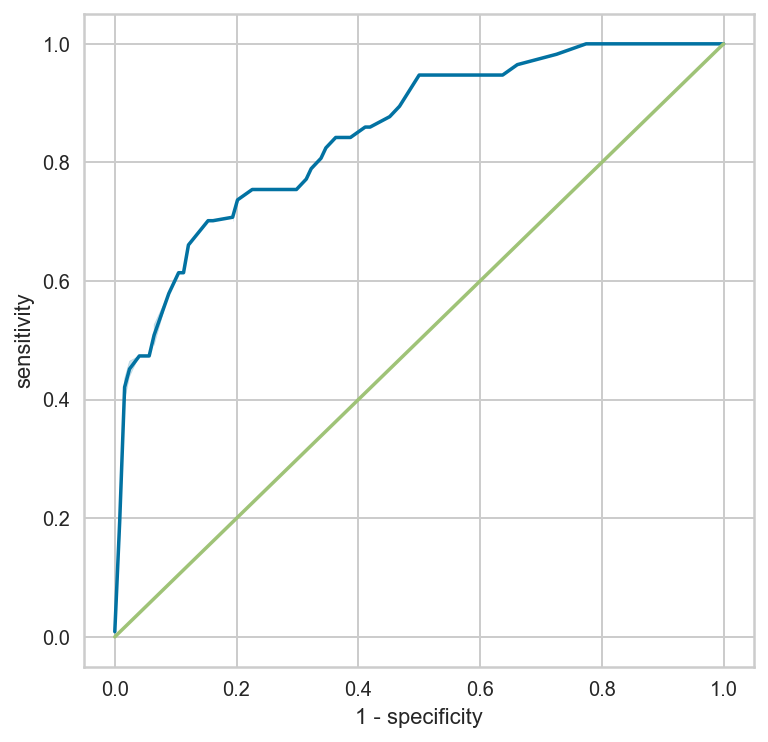

In [63]:
# My ROC
my_roc()

In [64]:
# my AUC
print("My AUC = %.8f " % AUC)

My AUC = 0.84889643 


# Conclusion

I use LogisticRegression to predict results and use Yellowbrick to draw ROC and calculate AUC. Also, I draw ROC and calculate AUC by myself. The AUC of Yellowbrick is 0.85. My AUC is 0.84889643. They are almost equal.

# Reference

https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

https://pbpython.com/pandas-crosstab.html

https://zh.wikipedia.org/zh-cn/ROC%E6%9B%B2%E7%BA%BF

https://github.com/DistrictDataLabs/yellowbrick/issues/1137

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html?highlight=ConfusionMatrix#yellowbrick.classifier.confusion_matrix.ConfusionMatrix
